In [1]:
%matplotlib inline
from statsmodels.compat import lzip

import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import matplotlib.pyplot as plt


In [4]:
# Load data
url = 'https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/HistData/Guerry.csv'
dat = pd.read_csv(url)

dat.iloc[:,1:]

,dept,Region,Department,Crime_pers,Crime_prop,Literacy,Donations,Infants,Suicides,MainCity,...,Crime_parents,Infanticide,Donation_clergy,Lottery,Desertion,Instruction,Prostitutes,Distance,Area,Pop1831
0,1,E,Ain,28870,15890,37,5098,33120,35039,2:Med,...,71,60,69,41,55,46,13,218.372,5762,346.03
1,2,N,Aisne,26226,5521,51,8901,14572,12831,2:Med,...,4,82,36,38,82,24,327,65.945,7369,513.00
2,3,C,Allier,26747,7925,13,10973,17044,114121,2:Med,...,46,42,76,66,16,85,34,161.927,7340,298.26
3,4,E,Basses-Alpes,12935,7289,46,2733,23018,14238,1:Sm,...,70,12,37,80,32,29,2,351.399,6925,155.90
4,5,E,Hautes-Alpes,17488,8174,69,6962,23076,16171,1:Sm,...,22,23,64,79,35,7,1,320.280,5549,129.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,86,W,Vienne,15010,4710,25,8922,35224,21851,2:Med,...,20,1,44,40,38,65,18,170.523,6990,282.73
82,87,C,Haute-Vienne,16256,6402,13,13817,19940,33497,2:Med,...,68,6,78,55,11,84,7,198.874,5520,285.13
83,88,E,Vosges,18835,9044,62,4040,14978,33029,2:Med,...,58,34,5,14,85,11,43,174.477,5874,397.99
84,89,C,Yonne,18006,6516,47,4276,16616,12789,2:Med,...,32,22,35,51,66,27,272,81.797,7427,352.49


In [5]:
# Fit regression model (using the natural log of one of the regressors)
results = smf.ols('Lottery ~ Literacy + np.log(Pop1831)', data=dat).fit()

# Inspect the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                Lottery   R-squared:                       0.348
Model:                            OLS   Adj. R-squared:                  0.333
Method:                 Least Squares   F-statistic:                     22.20
Date:                Wed, 02 Mar 2022   Prob (F-statistic):           1.90e-08
Time:                        16:42:53   Log-Likelihood:                -379.82
No. Observations:                  86   AIC:                             765.6
Df Residuals:                      83   BIC:                             773.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         246.4341     35.233     

# Linearity & Equal variance

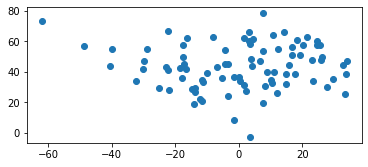

In [4]:
# dat['Lottery'].values
# results.fittedvalues

# Both can be tested by plotting residuals vs. predictions, where residuals are prediction errors.
# the model does not meet the linear model assumption, we would expect to see residuals that are very large 
# (big positive value or big negative value). To assess the assumption of linearity we want to ensure that the 
# residuals are not too far away from 0 (standardized values less than -2 or greater than 2 are deemed problematic). 
# To assess if the homoscedasticity assumption is met we look to make 
#sure that there is no pattern in the residuals and that they are equally spread around the y = 0 line.

pred_val = results.fittedvalues.copy()
true_val = dat['Lottery'].values.copy()
residual = true_val - pred_val

fig, ax = plt.subplots(figsize=(6,2.5))
_ = ax.scatter(residual, pred_val)

In [5]:
#Linearity
#Harvey-Collier multiplier test for Null hypothesis that the linear specification is correct:

name = ['t value', 'p value']
test = sms.linear_harvey_collier(results)
lzip(name, test)

[('t value', -1.0796490077806065), ('p value', 0.2834639247548736)]

# Other statistical heteroskedasticity tests

In [6]:
# Breush-Pagan test:

name = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']
test = sms.het_breuschpagan(results.resid, results.model.exog)
print('Breush-Pagan test:', lzip(name, test), '\n')

#Goldfeld-Quandt test

name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(results.resid, results.model.exog)
print('Goldfeld-Quandt test', lzip(name, test))

Breush-Pagan test: [('Lagrange multiplier statistic', 4.8932133740939765), ('p-value', 0.08658690502352126), ('f-value', 2.5037159462564453), ('f p-value', 0.08794028782672943)] 

Goldfeld-Quandt test [('F statistic', 1.1002422436378143), ('p-value', 0.38202950686925324)]


# Normality of the residuals

In [7]:
#Jarque-Bera test:
# a large J-B value indicates that errors are not normally distributed.
# a result of 1 means that the null hypothesis has been rejected at the 5% significance level. 
# In other words, the data does not come from a normal distribution.

name = ['Jarque-Bera', 'Chi^2 two-tail prob.', 'Skew', 'Kurtosis']
test = sms.jarque_bera(results.resid)
lzip(name, test)

[('Jarque-Bera', 3.3936080248431613),
 ('Chi^2 two-tail prob.', 0.18326831231663415),
 ('Skew', -0.48658034311223336),
 ('Kurtosis', 3.0034177578816315)]

In [8]:
#Kolmogorov–Smirnov test
from scipy import stats
stats.kstest(results.resid, 'norm')

KstestResult(statistic=0.5006199896997616, pvalue=1.8512242994407678e-20)

0.9781386782513122

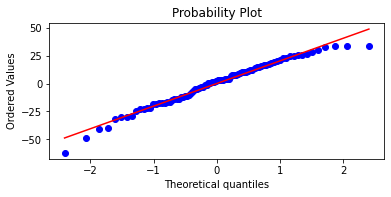

In [9]:
import scipy as sp

fig, ax = plt.subplots(figsize=(6,2.5))
_, (__, ___, r) = sp.stats.probplot(residual, plot=ax, fit=True)
r**2

In [10]:
#Omni test:
name = ['Chi^2', 'Two-tail probability']
test = sms.omni_normtest(results.resid)
lzip(name, test)

[('Chi^2', 3.713437811597174), ('Two-tail probability', 0.15618424580304888)]

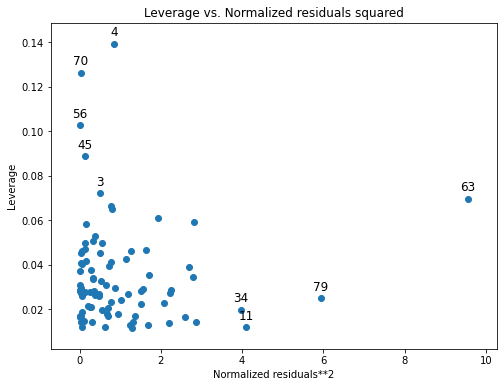

In [11]:
from statsmodels.graphics.regressionplots import plot_leverage_resid2
fig, ax = plt.subplots(figsize=(8,6))
fig = plot_leverage_resid2(results, ax = ax)

In [12]:
#Multicollinearity
np.linalg.cond(results.model.exog)

702.179214549006